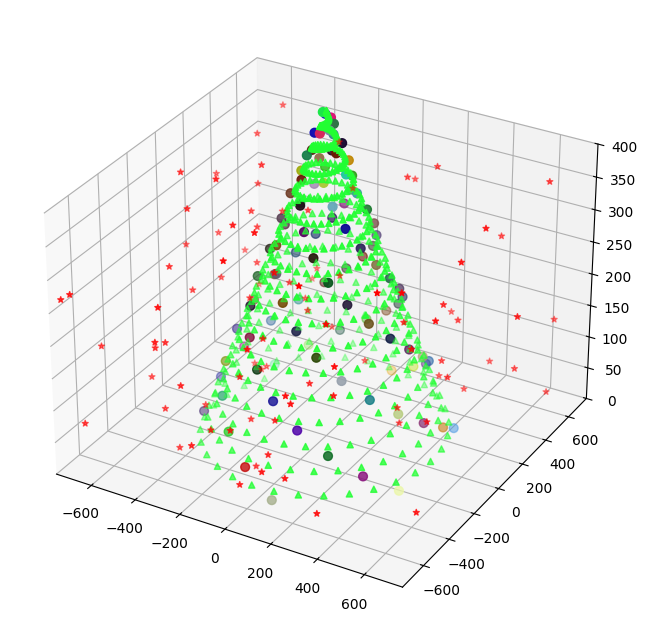

In [1]:
import math
import random
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection="3d")

# Экспериментируйте!
random.seed(2025)

CLR_0 = '#22ff33'
MARKER_1 = '^'
MARKER_2 = 'o'
MARKER_SNOW = '*'  

K = 500
XLIM = 760
YLIM = 760
ZLIM = 400  
STEP = 5
NUM_SNOWFLAKES = 100  
SPEED = 5  

X_snow = np.random.uniform(-XLIM, XLIM, NUM_SNOWFLAKES)
Y_snow = np.random.uniform(-YLIM, YLIM, NUM_SNOWFLAKES)
Z_snow = np.random.uniform(0, ZLIM, NUM_SNOWFLAKES)

def init():
    k = K
    Z = [i for i in range(k)]
    X = [math.cos(i/5)*(k-i) for i in range(k)]
    Y = [math.sin(i/5)*(k-i) for i in range(k)]
    ax.scatter(X, Y, Z, c=CLR_0, marker=MARKER_1)

    step = STEP
    clr = [(abs(random.random()-i/k), abs(random.random()-i/k), abs(random.random()-i/k)) for i in range(1, k, step)]
    Z = [i for i in range(1, k, step)]
    X = [math.cos(i/5+2)*(k-i+10) for i in range(1, k, step)]
    Y = [math.sin(i/5+2)*(k-i+10) for i in range(1, k, step)]
    ax.scatter(X, Y, Z, c=clr, marker=MARKER_2, s=40)

    plt.xlim(-XLIM, XLIM)
    plt.ylim(-YLIM, YLIM)
    ax.set_zlim(0, ZLIM)

    ax.scatter(X_snow, Y_snow, Z_snow, c="red", marker=MARKER_SNOW, s=20)

    return fig,

def animate(f):
    global Z_snow

    fig.clear()
    ax = fig.add_subplot(111, projection="3d")

    k = K
    Z = [i for i in range(k)]
    X = [math.cos(i/5+f/10)*(k-i) for i in range(k)]
    Y = [math.sin(i/5+f/10)*(k-i) for i in range(k)]
    ax.scatter(X, Y, Z, c=CLR_0, marker=MARKER_1)

    step = STEP
    clr = [(abs(random.random()-i/k), abs(random.random()-i/k), abs(random.random()-i/k)) for i in range(1, k, step)]
    Z = [i for i in range(1, k, step)]
    X = [math.cos(i/5+2+f/10)*(k-i+10) for i in range(1, k, step)]
    Y = [math.sin(i/5+2+f/10)*(k-i+10) for i in range(1, k, step)]
    ax.scatter(X, Y, Z, c=clr, marker=MARKER_2, s=40)

    plt.xlim(-XLIM, XLIM)
    plt.ylim(-YLIM, YLIM)
    ax.set_zlim(0, ZLIM)

    Z_snow -= SPEED
    Z_snow[Z_snow < 0] = ZLIM  

    ax.scatter(X_snow, Y_snow, Z_snow, c="red", marker=MARKER_SNOW, s=20)

    return fig,

ani = animation.FuncAnimation(fig, animate, init_func=init, frames=90, interval=50, blit=True)

gif_writer = animation.PillowWriter(fps=30)
ani.save('prac_8.gif', writer=gif_writer)
